### Minimum norm solution for underdetermined problems
Consider the simplest under-determined problem, consisting of 1 data (equation) for 2 unknowns.

In [37]:
G = [2 1]
d = [3]

1-element Array{Int64,1}:
 3

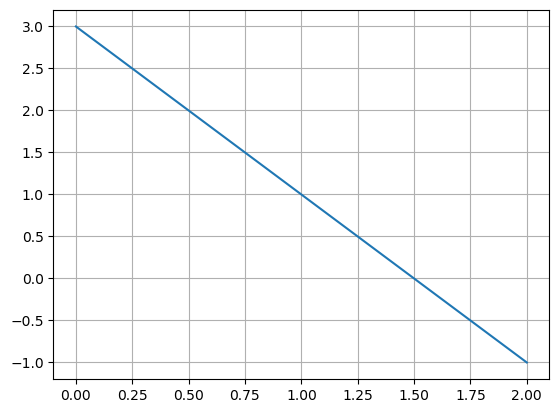

In [38]:
# It can be plotted as a curve (d - A11*m1)/A12
using PyPlot
x = [0, 2]
plot(x, (d[1] .- G[1, 1] .* x) ./ G[1, 2])
grid()

In [39]:
# Apparently, the backslash computes something of it
m = G \ d

2-element Array{Float64,1}:
 1.2
 0.6

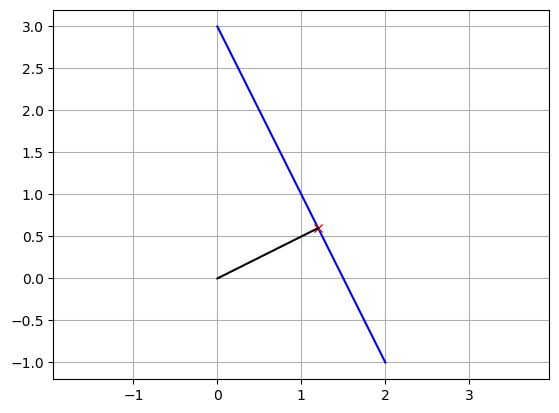

In [41]:
plot(x, (d[1] .- G[1, 1] .* x) ./ G[1, 2], "b-")
plot(m[1], m[2], "rx")
plot([0, m[1]], [0, m[2]], "k-")
axis("equal")
grid("major")

The minimum-norm solution is computed by
$$ {\bf m} = {\bf G}^T ({\bf G}{\bf G}^T)^{-1} {\bf d} $$
Let's test this:

In [42]:
GT = transpose(G)
m = GT * inv(G * GT) * d

2-element Array{Float64,1}:
 1.2000000000000002
 0.6000000000000001

Obviously, the backslash uses the minimum-norm solution (or something equivalent) for purely under-determined problems.

We do another, very similar, experiment (numerically the same).

In [43]:
G = [2 1;4 2]
d = [3.2;2.0]

2-element Array{Float64,1}:
 3.2
 2.0

In [45]:
x = [0, 2]
plot(x, (d[1] .- G[1, 1] .* x) ./ G[1, 2])
plot(x, (d[2] .- G[2, 1] .* x) ./ G[2, 2])
grid()
m = G\d

LinearAlgebra.SingularException: LinearAlgebra.SingularException(2)

In [47]:
GT = transpose(G)
# check minumum norm solution
display(G * GT)
m = GT * inv(G * GT) * d
# maybe the backslash is intelligent enough?
# G\d

2×2 Array{Int64,2}:
  5  10
 10  20

LinearAlgebra.SingularException: LinearAlgebra.SingularException(2)

Let us check the problem from the lecture.

In [48]:
G = [1 1 0;0 0 1]
m = [1;2;3]
d = G * m

2-element Array{Int64,1}:
 3
 3

In [49]:
GT = transpose(G)
# check minumum norm solution
m = GT * inv(G * GT) * d
# maybe the backslash is intelligent enough?
print(m, G\d)
# apparently nearly the same but NOT identical!

[1.5, 1.5, 3.0][1.4999999999999991, 1.4999999999999998, 3.0]

We add some data (equations).

In [51]:
G = [1 1 0;2 2 0;0 0 1]
m = transpose(G) * inv(G * transpose(G)) * d
# G \ (G*m)

LinearAlgebra.SingularException: LinearAlgebra.SingularException(2)

In [52]:
G = [1 1 0;0 0 1;1 1 1]
display(G)
m = transpose(G) * inv(G * transpose(G)) * d

3×3 Array{Int64,2}:
 1  1  0
 0  0  1
 1  1  1

LinearAlgebra.SingularException: LinearAlgebra.SingularException(3)

Obviously we need something different for partly under-determined or mixed-determined problems!